## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
happiness["country"] = happiness["country"].apply(lambda d: d.lower())
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [5]:
# Write your code here
country_features = pd.merge(happiness, countries,  left_on='country', right_on='country_name').drop('country_name', axis = 1)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [6]:
# Write your code here
country_features = country_features.sort_values('happiness_score', axis = 0, ascending=False)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,"100,0"
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,"100,0"
115,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,"99,0"
50,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,"99,9"
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,"100,0"


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# Write your code here
country_features_grouped = country_features.groupby('world_region')['happiness_score']
country_features_grouped.head() #peut pas print parce que c'est un groupby object -> pas print des groupby, mais des Dataframe

38     7.8087
31     7.6456
115    7.5599
50     7.5045
92     7.4880
88     7.2996
21     7.2321
5      7.2228
56     7.1286
27     7.1214
127    6.9396
30     6.9109
125    6.7908
81     6.4650
128    6.4401
103    6.4065
45     6.3989
107    6.3771
15     6.3756
109    6.3634
108    6.2806
129    6.2576
8      6.2273
71     6.2155
98     6.1863
63     6.1021
80     6.1013
61     6.0579
97     6.0060
118    5.9988
59     5.8708
93     5.6933
82     5.6075
116    5.5557
101    5.5460
83     5.4562
76     5.3843
131    5.3535
12     5.2160
43     5.1480
86     5.1372
24     5.1239
20     5.0849
104    4.9808
9      4.8328
112    4.3270
51     3.5733
Name: happiness_score, dtype: float64

In [8]:
country_features_grouped_agg = country_features_grouped.agg(['mean', 'count']).sort_values('mean', ascending=False)
country_features_grouped_agg.head(10)

,mean,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [9]:
# Write your code here
print(country_features_grouped_agg.index)

Index(['North America and ANZ', 'Western Europe',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'Southeast Asia', 'East Asia', 'Commonwealth of Independent States',
       'Middle East and North Africa', 'Sub-Saharan Africa', 'South Asia'],
      dtype='object', name='world_region')


In [10]:
Winners = country_features[country_features['world_region'] == country_features_grouped_agg.index[0]]
Winner_Countries = Winners.loc[:, ['country', 'happiness_score']]
Winner_Countries.head()

,country,happiness_score
88,new zealand,7.2996
21,canada,7.2321
5,australia,7.2228
127,united states,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [11]:
# Write your code here
country_100_previous = country_features[country_features['literacy']=='100,0']
country_100 = country_100_previous[['world_region','country','happiness_score']]
country_100.head()

,world_region,country,happiness_score
38,Western Europe,finland,7.8087
31,Western Europe,denmark,7.6456
92,Western Europe,norway,7.4880
72,Western Europe,luxembourg,7.2375
5,North America and ANZ,australia,7.2228


What is the global average?

In [12]:
# Write your code here
country_features['literacy'] = country_features['literacy'].str.replace(',', '.').astype(float)

In [21]:
global_avg = country_features['literacy'].mean()
print(global_avg)

81.85112781954888


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [28]:
# Write your code here
nb_countries_50 = len(country_features[country_features['literacy']<=50])
nb_countries = len(country_features)
x = nb_countries_50/nb_countries;
print('{percent:.2%}'.format(percent=x))

11.85%


Print the raw number and the percentage of world population that is illiterate.

In [43]:
# Write your code here
country_features['illiterated_people'] = country_features['population']-(country_features['literacy']*country_features['population']/100)
raw_nbr = round(country_features.loc[:,'illiterated_people'].sum())
print('raw number: ',raw_nbr)
pop_nbr = country_features.loc[:,'population'].sum()
y = raw_nbr/pop_nbr
print('percentage of world population illiterate :','{percent:.2%}'.format(percent=y))

raw number:  1249372988
percentage of world population illiterate : 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [44]:
# Write your code here
country_features['population_density'] = country_features['population']/country_features['area']
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,illiterated_people,population_density
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,100.0,0.000,15.470795
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,100.0,0.000,126.483060
115,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,99.0,75239.340,182.221700
50,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,99.9,299.388,2.906680
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,100.0,0.000,14.239628


What is the happiness score of the 3 countries with lowest population density?

In [57]:
# Write your code here
country_features.sort_values('population_density', ascending=True, inplace=True)
countries_3 = country_features.iloc[:3,:].loc[:,['country' ,'happiness_score', 'population_density']]
countries_3.head()

,country,happiness_score,population_density
83,mongolia,5.4562,1.810751
5,australia,7.2228,2.636201
14,botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>

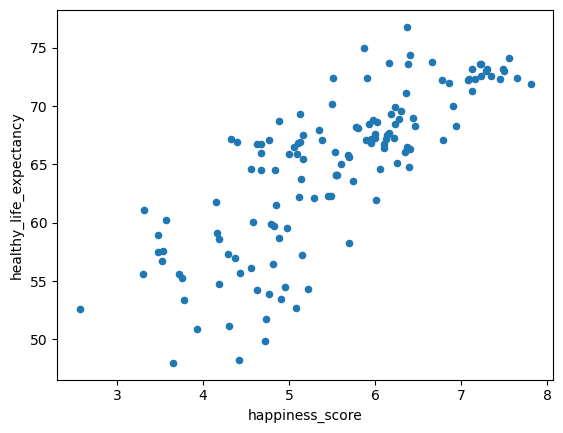

In [61]:
# Write your code here
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.